<h3> Libraries <h3>

In [54]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
import pickle
import numpy as np
import matplotlib.pyplot  as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

<h3>Loading the  product data series from the other notebook <h3>

In [55]:

with open('product_df.pkl', 'rb') as f:
    product_df_2 = pickle.load(f)

<h3> Normalizing the data <h3>

In [56]:
scaler = MinMaxScaler()
product_df_2 = scaler.fit_transform(product_df_2)
print(product_df_2)

[[9.07264597e-04]
 [2.17030653e-01]
 [2.33750243e-01]
 [1.23128767e-01]
 [5.02235759e-02]
 [2.68291102e-02]
 [6.99889832e-03]
 [1.68491997e-03]
 [8.10057676e-03]
 [2.86436394e-02]
 [2.42174843e-01]
 [1.85859633e-01]
 [4.24340613e-01]
 [3.13135895e-01]
 [2.79631910e-01]
 [2.77946990e-01]
 [7.29051908e-02]
 [1.49050612e-02]
 [9.00784136e-03]
 [1.67195904e-02]
 [5.83241527e-03]
 [2.64402825e-02]
 [2.19752446e-01]
 [3.55906941e-01]
 [4.70935131e-01]
 [2.58894433e-01]
 [1.88840645e-01]
 [1.12760029e-01]
 [6.46102002e-02]
 [9.07264597e-03]
 [9.39666904e-03]
 [4.01788607e-03]
 [3.40224224e-02]
 [9.75309442e-02]
 [1.20990215e-01]
 [2.40878751e-01]
 [5.40211263e-01]
 [4.48771953e-01]
 [2.86306785e-01]
 [1.12500810e-01]
 [4.91218975e-02]
 [1.38033828e-02]
 [7.51733523e-03]
 [9.91510596e-03]
 [1.29609228e-02]
 [1.03363359e-01]
 [2.35240749e-01]
 [3.63553885e-01]
 [4.34903765e-01]
 [6.59127730e-01]
 [2.70300045e-01]
 [1.83008230e-01]
 [4.89922883e-02]
 [5.24917374e-02]
 [1.61363489e-02]
 [3.693863

<h3> Turning it into series data type <h3>

In [57]:
series = product_df_2
print(len(series))

152


<h3> SARIMAX model training <h3>

In [58]:


# Create a pandas Series from the list
data = series[:107]
# Define the SARIMA model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# Fit the model
results = model.fit(disp=False)
# Generate predictions for training dataset
predictions_train = results.get_prediction(start=121, end=len(series)-1)
pred_values_train = predictions_train.predicted_mean
confidence_intervals_train = predictions_train.conf_int()
# Generate predictions for future steps
forecast_steps = 10
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = np.arange(len(data), len(data) + forecast_steps)
forecast_values = forecast.predicted_mean


<h3> Plotting the predictions for training and test <h3>

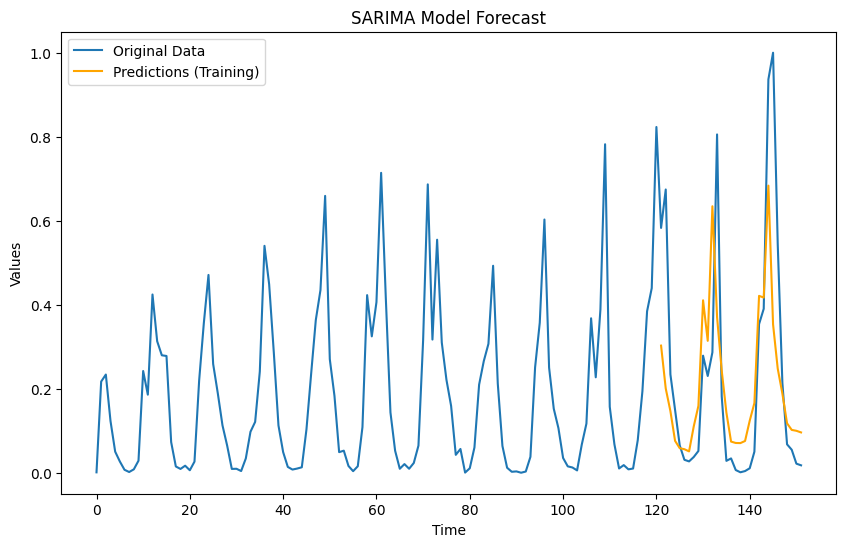

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(series, label='Original Data')
plt.plot(range(121,152),pred_values_train, label='Predictions (Training)', color='orange')

plt.legend()
plt.title('SARIMA Model Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

<h3> Sum of squared Residuals <h3>

In [60]:
print(np.sum(   (pred_values_train-series[121:].flatten())**2 )  )

1.3205107282564186
